# Text Data
### _By: Ankur Patel, Myriam Ibrahim_
---

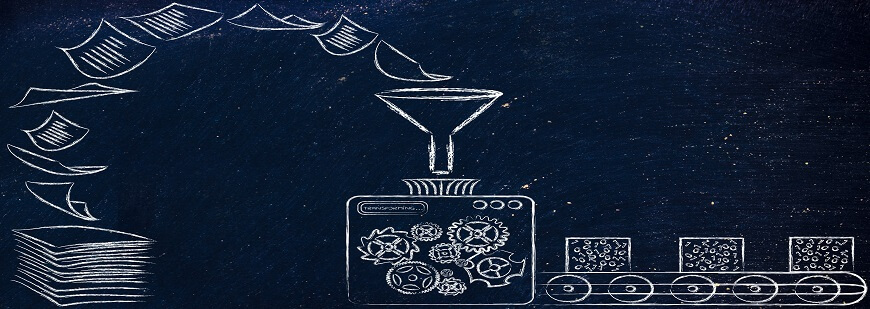

In [302]:
from IPython.display import Image
Image("Text-classification-in-data-mining-1.jpg")

### Description:
The dataset consists of Women’s fashion online shop reviews, consisting of a title, a review text, and whether the review author would recommend the product. We tried to determine whether a reviewer will recommend a product or not based on review title and review. In a real application, this might allow us to find out what is good or bad about certain products or to feature more typical reviews (like a very critical and a very positive one).

- Tasks 1, 2: Ankur Patel
- Tasks 3, 4: Myriam Ibrahim


- The tasks were done separately: Ankur used Jupyter, and Myriam used Colaboratory, but we communicated and worked together virtually
- some lengthy results will be commented out for saving space


### Task 1: Title and Body

Look at four ways to use the data:

1) Use the title only

2) Use the review body only

3) Concatenate the title and review to a single text and analyze that (discarding the information which words were in the title and which in the body)

4) Vectorizing title and review individually and concatenating the vector representations.

Use CountVectorizer with the default settings and train a linear classifier. Visualize the 20 most important features in the linear model. Tune the regularization parameter of the classifier, and visualize the 20 most important features after regularization.

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [196]:
df_train = pd.read_csv("hw5_data_train.csv", error_bad_lines=False)
df_test = pd.read_csv("hw5_data_test.csv", error_bad_lines=False)

In [197]:
df = df_train.append(df_test)
df.head()

Title  \
0     Beautiful unique dress   
1      Had high hopes but...   
2  Buttons -buttons so cute!   
3            Love this dress   
4      Perfect summer pants!   

                                              Review  Recommended  
0  Wore this to my sons wedding. found it last mi...            1  
1  Gals, if you absolutely must have this top wai...            0  
2  I hardly believe i have not reviewed htis yet....            1  
3  This dress is so cute and comfortable. i'm nor...            1  
4  The linen- cotton blend breathes so well for a...            1

In [124]:
df.count()

Title          23486
Review         23486
Recommended    23486
dtype: int64

### CountVectorizer :

- Review will show results combined clearly (the 4 settings done seperately to see detailed differences)

In [198]:
# replacing NA with " " and defining columns of dataset
df = df.fillna(" ")
y = df["Recommended"]
X_t = df["Title"]
X_r = df["Review"]
TR = pd.concat([X_t, X_r])
RT = ["{} {}".format(X_t, X_r) for X_t, X_r in zip(X_t, X_r)]

In [199]:
# fit_transform for scores
# fit for vocabulary and features
df_list = [X_t, X_r, TR, RT]
df_cv = ["Title","Review","Title_Review","TitleReview"]
df_cols = ["Title_0","Review_1","Title_Review_2","TitleReview_3"]
df_c = ["T_fit","R_fit","T_R_fit","TR_fit"]
df_voc = ["T_voc","R_voc","T_R_voc","TR_voc"]
df_ftrs = ["T_ftrs","R_ftrs","T_R_ftrs","TR_ftrs"]
df_array =  ["T_array","R_array","T_R_array","TR_array"]

for i,j in enumerate(df_list):
    df_cv[i] = CountVectorizer().fit_transform(df_list[i], y)
    df_c[i] = CountVectorizer().fit(df_list[i], y)
    df_voc[i] = df_c[i].vocabulary_
    df_ftrs[i] = df_c[i].get_feature_names()
#     df_array[i] = df_cv[i].toarray().sum(axis=0)
    print("Shape of Sparse Matrix for {}: {}".format(df_cols[i], df_cv[i].shape))
    print("Amount of Non-Zero occurences for {}: {}".format(df_cols[i], df_cv[i].nnz))
    print("Sparsity: %.2f%%" % (100.0 * df_cv[i].nnz /
                                 (df_cv[i].shape[0] * df_cv[i].shape[1])))

Shape of Sparse Matrix for Title_0: (23486, 3751)
Amount of Non-Zero occurences for Title_0: 63628
Sparsity: 0.07%
Shape of Sparse Matrix for Review_1: (23486, 14145)
Amount of Non-Zero occurences for Review_1: 966529
Sparsity: 0.29%
Shape of Sparse Matrix for Title_Review_2: (46972, 14679)
Amount of Non-Zero occurences for Title_Review_2: 1030157
Sparsity: 0.15%
Shape of Sparse Matrix for TitleReview_3: (23486, 14679)
Amount of Non-Zero occurences for TitleReview_3: 999907
Sparsity: 0.29%


In [226]:
# defining plot for coefficients (red for negative, blue for positive)
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

LogisticRegression score for Title_0: 0.8975559908030316
MultinomialNB score for Title_0: 0.8901473218087371
LinearSVC score for Title_0: 0.9210167759516308


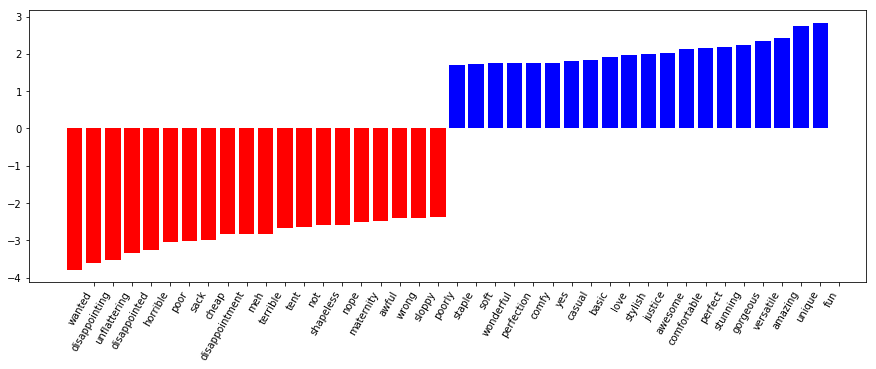

None


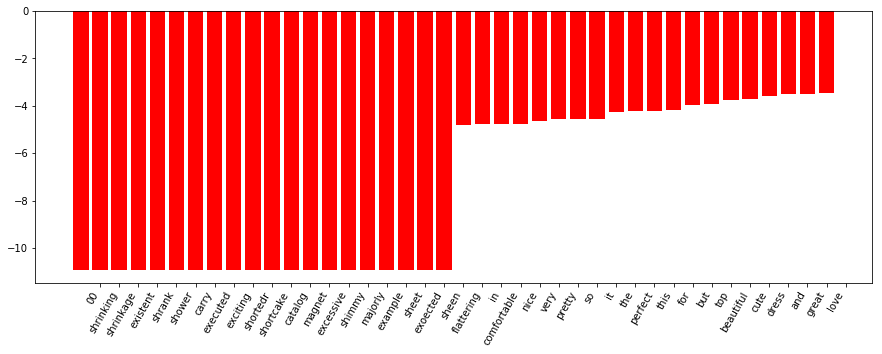

None


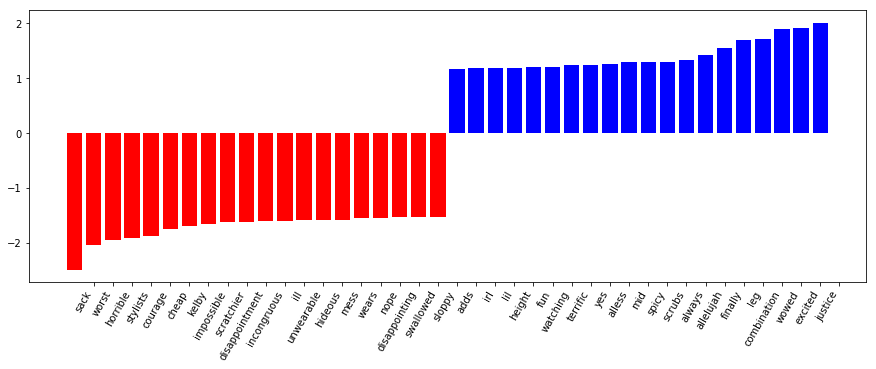

None
LogisticRegression score for Review_1: 0.9526952226858554
MultinomialNB score for Review_1: 0.9103721365920122
LinearSVC score for Review_1: 0.9810525419398791


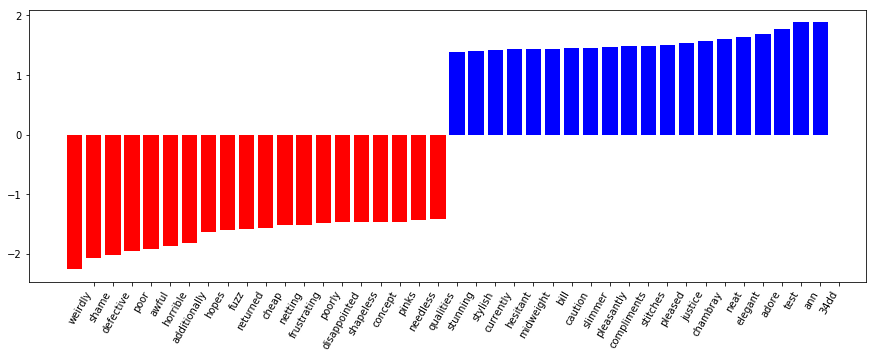

None


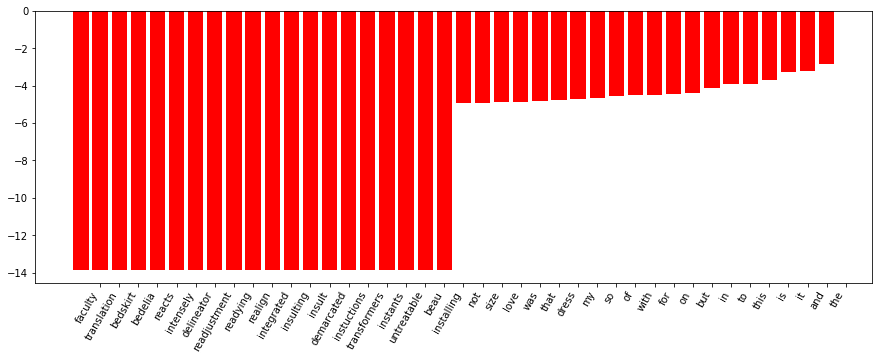

None


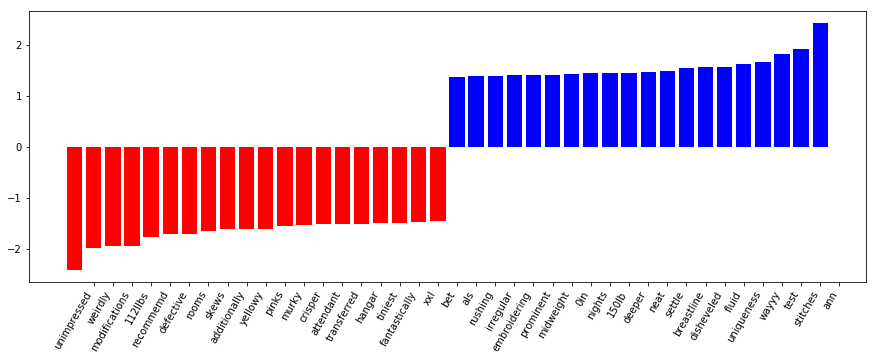

None
LogisticRegression score for TitleReview_3: 0.9615089840756195
MultinomialNB score for TitleReview_3: 0.9167589202077834
LinearSVC score for TitleReview_3: 0.9859064974878651


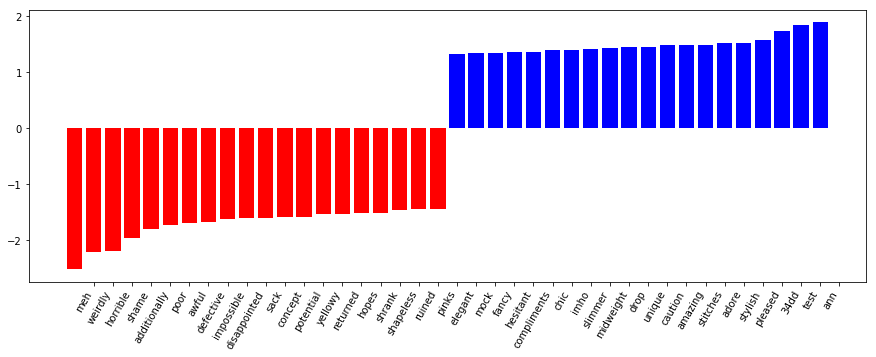

None


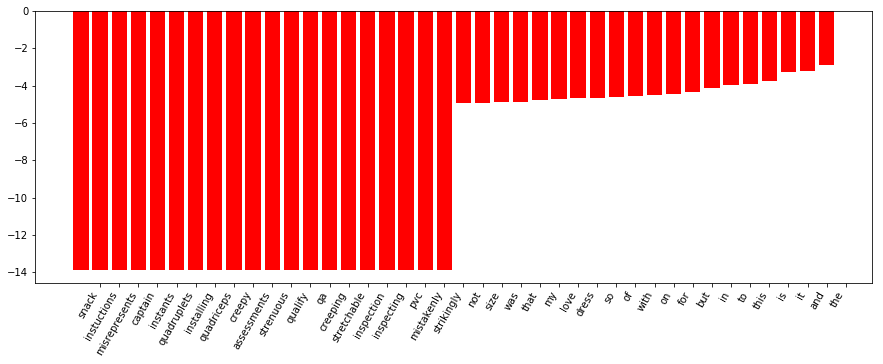

None


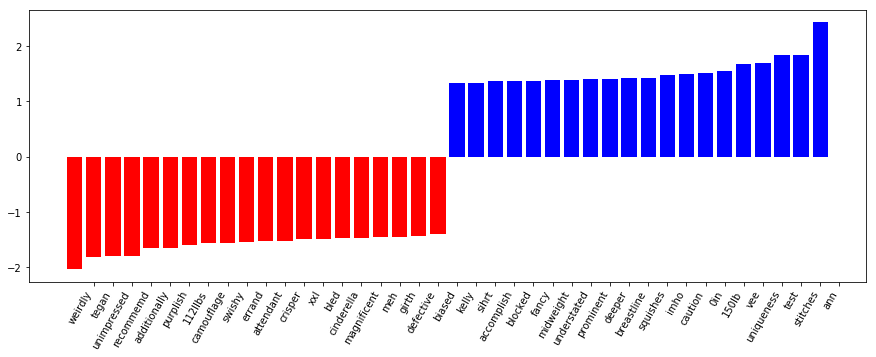

None


In [236]:
df_cv1 = df_cv[:2]
df_cv1.append(df_cv[3])
df_c1 = df_c[:2]
df_c1.append(df_c[3])
df_cols1 = ["Title_0","Review_1","TitleReview_3"]


for i,j in enumerate(df_cv1):
    glm_cv = LogisticRegression().fit(df_cv1[i], y)
    mNB_cv = MultinomialNB().fit(df_cv1[i], y)
    lSVC_cv = LinearSVC().fit(df_cv1[i], y)
    print("LogisticRegression score for {}: {}".format(df_cols1[i], glm_cv.score(df_cv1[i], y)))
    print("MultinomialNB score for {}: {}".format(df_cols1[i], mNB_cv.score(df_cv1[i], y)))
    print("LinearSVC score for {}: {}".format(df_cols1[i], lSVC_cv.score(df_cv1[i], y)))
    print(plot_coefficients(glm_cv, df_c1[i].get_feature_names()))
    print(plot_coefficients(mNB_cv, df_c1[i].get_feature_names()))
    print(plot_coefficients(lSVC_cv, df_c1[i].get_feature_names()))

### Train + Review
- Since they were concatenated such that their size was (46972, 14679), it couldn't be done in the for loop.

LogisticRegression score:  0.9090734905901388
MultinomialNB score:  0.8901260325300179
LinearSVC score:  0.9362386102358852


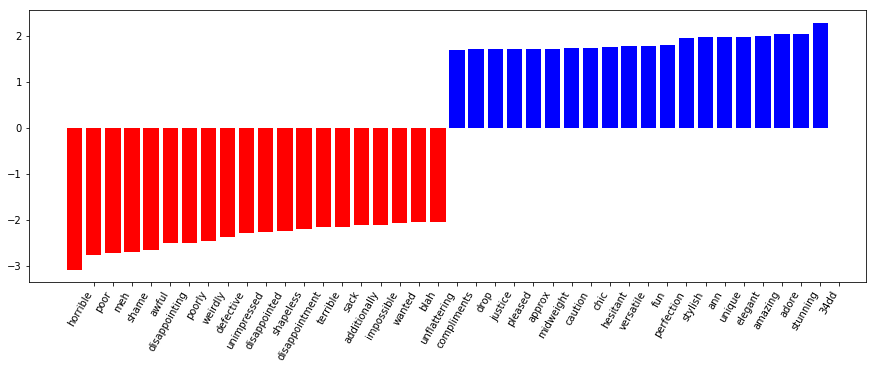

None


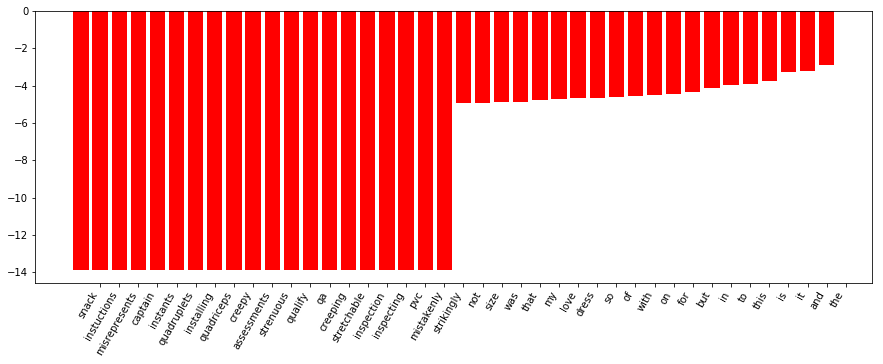

None


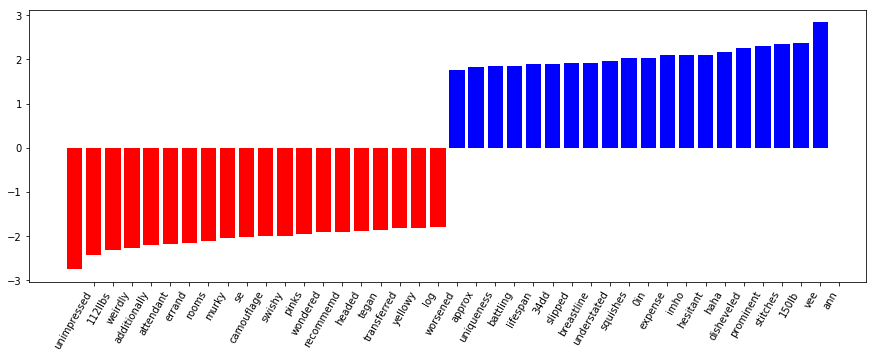

None


In [237]:
# Train_Review set
y1 = pd.concat([y, y]) #Recommended column doubled for this concat

glm_TR_cv = LogisticRegression().fit(df_cv[2], y1)
mNB_TR_cv = MultinomialNB().fit(df_cv[2], y1)
lSVC_TR_cv = LinearSVC().fit(df_cv[2], y1)

print("LogisticRegression score: ", glm_TR_cv.score(df_cv[2], y1))
print("MultinomialNB score: ", mNB_TR_cv.score(df_cv[2], y1))
print("LinearSVC score: ", lSVC_TR_cv.score(df_cv[2], y1))

print(plot_coefficients(glm_TR_cv, df_c[2].get_feature_names()))
print(plot_coefficients(mNB_TR_cv, df_c[2].get_feature_names()))
print(plot_coefficients(lSVC_TR_cv, df_c[2].get_feature_names()))

### Tuning

Tuned LinearSVC score:  0.986076811717619


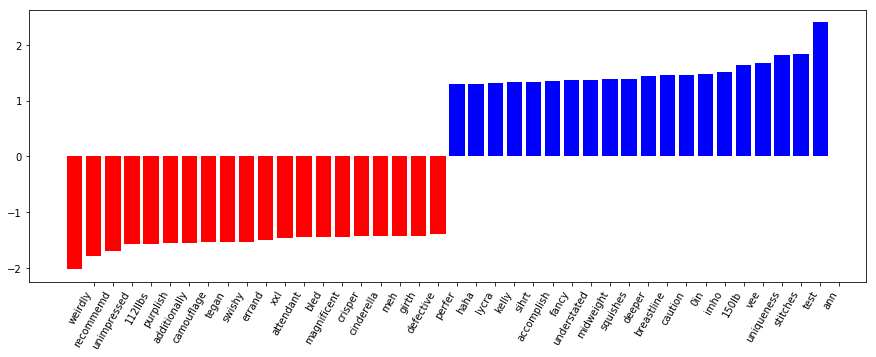

None


In [278]:
# tuned best performed classifier
tuned_lSVC = LinearSVC(tol=1e-1, max_iter=400)  #l1 l2 penalty in Task 4 
tuned_lSVC.fit(df_cv[3], y)  
print("Tuned LinearSVC score: ", tuned_lSVC.score(df_cv[3], y))
print(plot_coefficients(tuned_lSVC, df_c[3].get_feature_names()))

In [255]:
# GridSearchCV initial
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}  
grid_lSVC = GridSearchCV(LinearSVC(), param_grid, cv=5)  
grid_lSVC.fit(df_cv[3], y)  
print("Best cross-validation score: {:.2f}".format(grid_lSVC.best_score_))  
print("Best parameters: ", grid_lSVC.best_params_)  
scores = grid_lSVC.cv_results_['mean_test_score'].reshape(-1, 5).T
print("LinearSVC score: ", grid_lSVC.score(df_cv[3], y))

Best cross-validation score: 0.90
Best parameters:  {'C': 0.01}
LinearSVC score:  0.9311504726219876


### Review (1)
- Following are the performances of the classifiers for the certain datasets (highest one italicized):

| | LogisticRegression: | MultinomialNB: | LinearSVC: |
| --- | --- | --- |
| Train | 0.8975 | 0.8901 | 0.9210 |
| Review | 0.9527 | 0.9104 | 0.9809 |
| TR | 0.9091 | 0.8901 | 0.9362 |
| RT | 0.9615 | 0.9167 | _0.9859_ |

- Following is the shape and sparsity of the datasets:

| | Shape of Sparse Matrix: | Amount of Non-Zero occurences: | Sparsity: |
| --- | --- | --- |
| Train | (23486, 3751) | 63628 | 0.07% |
| Review | (23486, 14145) | 966529 | 0.29% |
| TR | (46972, 14679) | 1030157 | 0.15% |
| RT | (23486, 14679) | 999907 |  0.29% |

- The cofficients showed 20 top features and 20 lowest features
- The MultinomialNB gave all negative coefficients
- They varied in each method according to classifier and the set of data
- Tuning of LinearSVC(tol=1e-1, max_iter=400) improved the score by bare minimum

- Coding observation: 
    - fit = for get_feature_names and vocabulary_ 
    - fit_transform = for fits and transforms together once to get score at the end
    - score changes minimally everytime, since random_state was not defined

### Task 2: Feature Tuning

1) Try using TfidfVectorizer instead of CountVectorizer. Does it change the score? Does it change the important coefficients?

2) Remember that TfidfVectorizer uses normalization by default. Does using a Normalizer with CountVectorizer change the outcome?

3) Try using stop-word. Do the standard English stop-words help? Why / why not?

4) Limit the vocabulary using min_df or max_df. How to these impact the number of features, and how do they impact the scores?

- Since RT is much higher and most logical, that'll be used to compare with CountVectorizer 

In [239]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline

In [240]:
RT_tf = TfidfVectorizer().fit_transform(RT) 
RT_tf

<23486x14679 sparse matrix of type '<class 'numpy.float64'>'
	with 999907 stored elements in Compressed Sparse Row format>

LogisticRegression score:  0.9189304266371455
MultinomialNB score:  0.8369667035680831
LinearSVC score:  0.9598909988929575


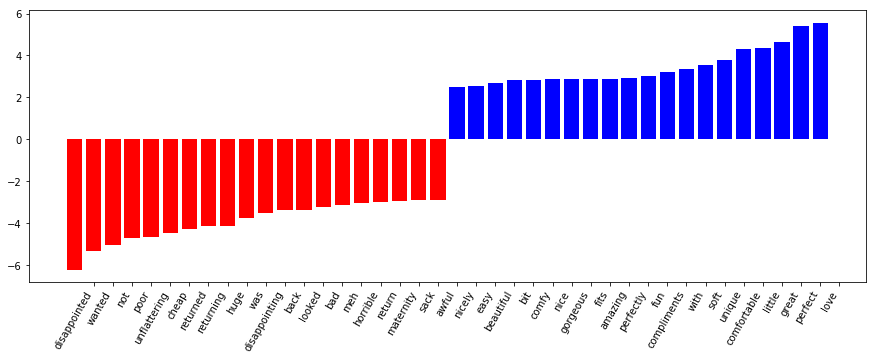

None


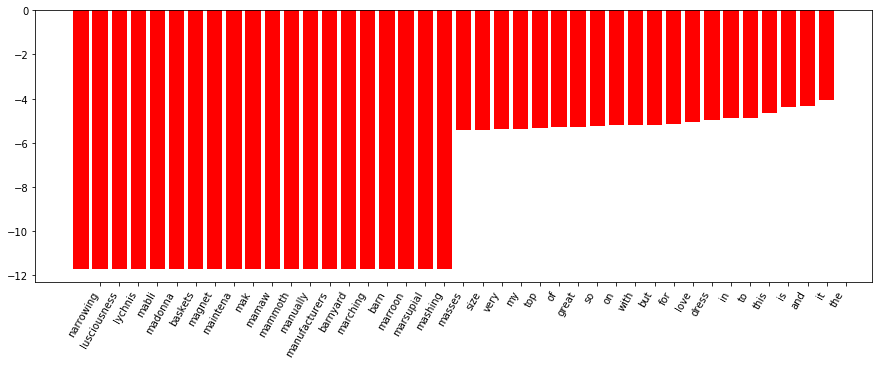

None


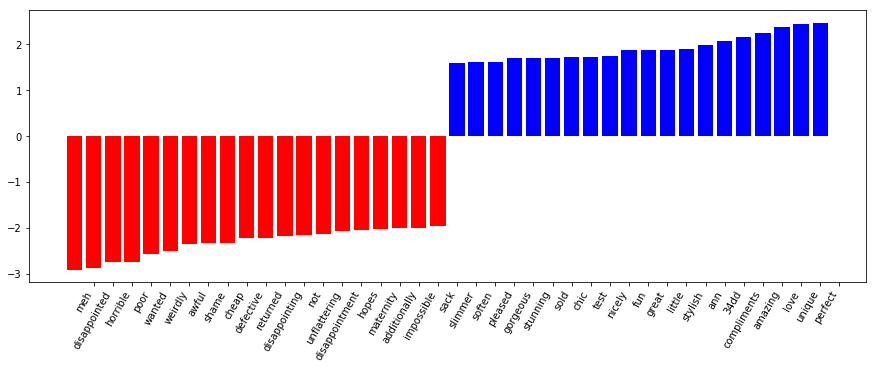

None


In [242]:
# classifier methods for TfidfVectorizer fit
glm_RT_tf = LogisticRegression().fit(RT_tf, y)
mNB_RT_tf = MultinomialNB().fit(RT_tf, y)
lSVC_RT_tf = LinearSVC().fit(RT_tf, y)

print("LogisticRegression score: ", glm_RT_tf.score(RT_tf, y))
print("MultinomialNB score: ", mNB_RT_tf.score(RT_tf, y))
print("LinearSVC score: ", lSVC_RT_tf.score(RT_tf, y))

print(plot_coefficients(glm_RT_tf, df_c[3].get_feature_names()))
print(plot_coefficients(mNB_RT_tf, df_c[3].get_feature_names()))
print(plot_coefficients(lSVC_RT_tf, df_c[3].get_feature_names()))

In [45]:
RT_t = TfidfVectorizer().fit(RT) 
feature_names = np.array(RT_t.get_feature_names())
sorted_coef_index = lSVC_RT_t.coef_[0].argsort()

sm_20_coef = sorted_coef_index[:20]
lrg_20_coef = sorted_coef_index[:-20:-1]
print('Smallest 20 Coefs:\n{}\n'.format(feature_names[sm_20_coef]))
print('Largest 20 Coefs: \n{}'.format(feature_names[lrg_20_coef]))

Smallest 20 Coefs:
['meh' 'disappointed' 'horrible' 'poor' 'wanted' 'weirdly' 'awful' 'shame'
 'cheap' 'defective' 'returned' 'disappointing' 'not' 'unflattering'
 'disappointment' 'hopes' 'maternity' 'additionally' 'impossible' 'sack']

Largest 20 Coefs: 
['perfect' 'unique' 'love' 'amazing' 'compliments' '34dd' 'ann' 'stylish'
 'little' 'great' 'fun' 'nicely' 'test' 'chic' 'sold' 'stunning'
 'gorgeous' 'pleased' 'soften']


In [ ]:
# df_cvtfidf = make_pipeline(CountVectorizer(), TfidfVectorizer()).fit_transform(RT)
bow_pipe = make_pipeline(CountVectorizer(), TfidfVectorizer())
df_cvtfidf = bow_pipe.fit_transform(RT)

# classifier methods for bow_pipe
glm_RT_ft = LogisticRegression().fit(df_cvtfidf, y)
mNB_RT_ft = MultinomialNB().fit(df_cvtfidf, y)
lSVC_RT_ft = LinearSVC().fit(df_cvtfidf, y)

print("LogisticRegression score: ", df_cvtfidf.score(df_cvtfidf, y))
print("\nMultinomialNB score: ", mNB_RT_tf.score(df_cvtfidf, y))
print("\nLinearSVC score: ", lSVC_RT_tf.score(df_cvtfidf, y))

In [52]:
stop_words = ["Dutch","English","French","German","Romanian","Russian"]
for i,param in enumerate(stop_words):
    vect_stopwords = CountVectorizer(stop_words=stop_words)
    vect_stopwords = vect_stopwords.fit_transform(RT)
    lSVC_stopwords = LinearSVC().fit(vect_stopwords, y)
    print("stop words = {} score: {}".format(stop_words[i], lSVC_stopwords.score(vect_stopwords, y)))
print("\nstop words shape: ", vect_stopwords.shape)

stop words = Dutch score: 0.9859490760453036
stop words = English score: 0.9859064974878651
stop words = French score: 0.9859064974878651
stop words = German score: 0.9859064974878651
stop words = Romanian score: 0.9858639189304267
stop words = Russian score: 0.9859490760453036

stop words shape:  (23486, 14679)


In [56]:
min_df = [0, 1, 2, 3, 4, 5]
for i,param in enumerate(min_df):
    vect_mindf = CountVectorizer(min_df=min_df[i])
    vect_mindf = vect_mindf.fit_transform(RT)
    lSVC_mindf = LinearSVC().fit(vect_mindf, y)
    print("\nmin_df = {} score: {}".format(min_df[i], lSVC_mindf.score(vect_mindf, y)))
    print("shape: ", vect_mindf.shape)


min_df = 0 score: 0.9859064974878651
shape:  (23486, 14679)

min_df = 1 score: 0.9859490760453036
shape:  (23486, 14679)

min_df = 2 score: 0.9833517840415567
shape:  (23486, 8462)

min_df = 3 score: 0.980413863578302
shape:  (23486, 6638)

min_df = 4 score: 0.9785829856084476
shape:  (23486, 5650)

min_df = 5 score: 0.9759431150472622
shape:  (23486, 5035)


In [62]:
max_df = [1, 10, 100, 1000, 5000, 10000, 50000, 75000, 100000]
for i,param in enumerate(max_df):
    vect_maxdf = CountVectorizer(max_df=max_df[i])
    vect_maxdf = vect_maxdf.fit_transform(RT)
    lSVC_maxdf = LinearSVC().fit(vect_maxdf, y)
    print("\nmax_df = {} score: {}".format(max_df[i], lSVC_maxdf.score(vect_maxdf, y)))
    print("shape: ", vect_maxdf.shape)


max_df = 1 score: 0.8636208805245679
shape:  (23486, 6217)

max_df = 10 score: 0.9038150387464873
shape:  (23486, 11308)

max_df = 100 score: 0.9449033466746146
shape:  (23486, 13667)

max_df = 1000 score: 0.977816571574555
shape:  (23486, 14490)

max_df = 5000 score: 0.9848420335519033
shape:  (23486, 14648)

max_df = 10000 score: 0.9857361832581112
shape:  (23486, 14669)

max_df = 50000 score: 0.9859916546027421
shape:  (23486, 14679)

max_df = 75000 score: 0.9859490760453036
shape:  (23486, 14679)

max_df = 100000 score: 0.9859490760453036
shape:  (23486, 14679)


### Review (2)

- TfidfVectorizer resulted in a lower score than CountVectorizer
- The stop words did not make much of a difference in the score, but rather lowered it by 0.3% for "english"
- The min_df of 0 showed the highest score of 98.59%, like the default model
- The max_df of 50000 was chosen since the score stabilized at that 

### Task 3 n-grams

1) Using your current best model, try changing from unigrams to n-grams of varying length. What provides the best performance? Visualize the coefficients. Try visualizing only the higher-order n-grams that are important.

2) Try using character n-grams. Visualize the coefficients. Can we learn something from this?

3) Investigate how min_df and the use of stop-words changes the number of features when using word n-grams, and how they change the score.

 

**By evaluating Scores in # 2 LinearSVC  outperformed Logistic Regression marginally ~ 2 points and will be used in next steps**


https://www.quora.com/How-do-I-train-a-SVM-classifier-from-text-examples

https://www.quora.com/What-is-better-for-text-classifacation-TF-IDF-+-SVM-or-N-grams-Markov-Model

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

In [244]:
lSVC_cv = CountVectorizer(ngram_range=(1,1)).fit(RT)
print("Vocabulary size: {}".format(len(lSVC_cv.vocabulary_)))
print("Vocabulary:\n{}".format(lSVC_cv.get_feature_names()))
# list of (1,1) ngram range = single words

Vocabulary size: 14679
Vocabulary:
['00', '000', '00p', '02', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite', '0r', '0verall', '0xs', '10', '100', '1000', '100lb', '100lbs', '101', '102', '102lbs', '103', '103lb', '103lbs', '104', '104lbs', '105', '105lb', '105lbs', '106', '106lbs', '107', '107lb', '107lbs', '107pound', '108', '108lbs', '109', '109lbs', '10l', '10lbs', '10mths', '10p', '10s', '10th', '10x', '11', '110', '110lb', '110lbs', '111', '111lbs', '112', '112lb', '112lbs', '112llbs', '113', '113lbs', '114', '114lb', '114lbs', '115', '115ish', '115lb', '115lbs', '115llbs', '116', '116bs', '116ibs', '116lb', '116lbs', '117', '117bl', '117lbs', '118', '118lb', '118lbs', '119', '11and', '11in', '11inches', '12', '120', '120lb', '120lbs', '121', '122', '122lb', '122lbs', '123', '123lb', '123lbs', '123lbssize', '124', '124lb', '124lbs', '125', '125b', '125ibs', '125ish', '125lb', '125lbs', '126', '126lbs', '127', '127lb', '127lbs', '128', '128b', '128lb', '128lbs', '129', '1

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, grid_search

pipe = make_pipeline(TfidVectorizer(min_df=5, LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100], 
              "tfidfvectorizer__ngram_range": [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)

**Evaluation of dataset and applying the best approacjh in case of imbalanced **

In [248]:
from sklearn.model_selection import train_test_split

text_train_sub, text_val, y_train_sub, y_val = train_test_split(RT, y, stratify=y, random_state=0)

Bin Count below indicates inbalanced training data ~ 1:4 which will impact the model learning and it will perform better  in predicting one class vs the other

In [249]:
print("Samples per class (training): {}".format(np.bincount(y_train_sub))) 
print("Samples per class (Test): {}".format(np.bincount(y_val))) 

Samples per class (training): [ 3129 14485]
Samples per class (Test): [1043 4829]


In [ ]:
# Not producing the expected results 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train_sub)

In [ ]:
# Not producing the expected results 
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(TfidfVectorizer(min_df=5), LinearSVC())
param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear'],'tfidfvectorizer_ngram_range': [(1,1), (1,2), (1,3)]}
  
grid = GridSearchCV(pipe, param_grid, cv=4)
grid.fit(text_train_sub, y_train_sub)


In [ ]:
# Trying Logistic Regression in case issue is with the param_grid
# Same error in grid.fit step
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {' LogisticRegression__C': [0.001, 0.01, 0.1, 1, 10]}
  
grid = GridSearchCV(pipe, param_grid, cv=5)
#grid.fit(RT_tf, y)
#grid.fit(TR_cv, y1)
#grid.fit(text_train_sub, y_train_sub)
#grid.fit(RT, y)


In [89]:
lSVC_cv3 = CountVectorizer(ngram_range=(1,3)).fit(RT)
print("Vocabulary size: {}".format(len(lSVC_cv3.vocabulary_)))
print("Vocabulary:\n{}".format(lSVC_cv3.get_feature_names()))
# list of (1,1) ngram range = single words

Vocabulary size: 929628


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [90]:
lSVC_cv2 = CountVectorizer(ngram_range=(1,2)).fit(RT)
print("Vocabulary size: {}".format(len(lSVC_cv2.vocabulary_)))
print("Vocabulary:\n{}".format(lSVC_cv2.get_feature_names()))
# list of (1,2) ngram range = single/two words

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
# Invalid due to range boundaries requirement - Included as example of error only
# Code throws an error indicating invalid combination
#lSVC2_cv = CountVectorizer(ngram_range=(2,2)).fit(RT)
#print("Vocabulary size: {}".format(len(lSVC2_cv.vocabulary_)))
#print("Vocabulary:\n{}".format(lSVC2_cv.get_feature_names()))
# list of (2,1) ngram range = single words

In [91]:
lSVC2_cv2 = CountVectorizer(ngram_range=(2,2)).fit(RT)
print("Vocabulary size: {}".format(len(lSVC2_cv2.vocabulary_)))
print("Vocabulary:\n{}".format(lSVC2_cv2.get_feature_names()))
# list of (2,2) ngram range = two words 

Vocabulary size: 235841


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [92]:
lSVC10_cv10 = CountVectorizer(ngram_range=(10,10)).fit(RT)
print("Vocabulary size: {}".format(len(lSVC10_cv10.vocabulary_)))
print("Vocabulary:\n{}".format(lSVC10_cv10.get_feature_names()))
# list of (10,10) ngram range = 10 words 


Vocabulary size: 1105705


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Impact of Stop-words on bi-grams & 4-gram**


In [0]:
from sklearn.model_selection import train_test_split
text_train_sub, text_val, y_train_sub, y_val = train_test_split(RT, y, stratify=y, random_state=0)

In [94]:
#n-grams evaluation
vect_ngm = CountVectorizer(ngram_range=(1,2), min_df=4).fit(text_train_sub)
print("Vocabulary size (1,2), min_df=4: ", len(vect_ngm.vocabulary_))
vect_ngms = CountVectorizer(ngram_range=(1,2), min_df=4, stop_words="english").fit(text_train_sub)
print("Vocabulary size (1,2), stopwords, min_df=4: ", len(vect_ngms.vocabulary_))
X_train1 = vect_ngms.transform(text_train_sub) 

vect_ngm2 = CountVectorizer(ngram_range=(2,2), min_df=2).fit(text_train_sub)
print("Vocabulary size (2,2), min_df=2: ", len(vect_ngm2.vocabulary_))
vect_ngms2 = CountVectorizer(ngram_range=(2,2), min_df=2, stop_words="english").fit(text_train_sub)
print("Vocabulary size (2,2), stopwords, min_df=4: ", len(vect_ngms2.vocabulary_))
X_train2 = vect_ngms2.transform(text_train_sub) 

vect_ngm4 = CountVectorizer(ngram_range=(4,4), min_df=4).fit(text_train_sub)
print("Vocabulary size (4,4), min_df=2: ", len(vect_ngm4.vocabulary_))
vect_ngms4 = CountVectorizer(ngram_range=(4,4), min_df=4, stop_words="english").fit(text_train_sub)
print("Vocabulary size (4,4), stopwords, min_df=4: ", len(vect_ngms4.vocabulary_))
X_train4 = vect_ngms4.transform(text_train_sub)  
print("X_train4 with stop words:\n{}".format(repr(X_train4)))  



Vocabulary size (1,2), min_df=4:  36369
Vocabulary size (1,2), stopwords, min_df=4:  22590
Vocabulary size (2,2), min_df=2:  67584
Vocabulary size (2,2), stopwords, min_df=4:  51020
Vocabulary size (4,4), min_df=2:  14135
Vocabulary size (4,4), stopwords, min_df=4:  335
X_train4 with stop words:
<17614x335 sparse matrix of type '<class 'numpy.int64'>'
	with 1891 stored elements in Compressed Sparse Row format>


**Evaluation of the following scenarios**

*  Scenario 1 : range=(1,2), min_df=4, stop_words="english"
*  Scenario 2 :range=(2,2), min_df=2, stop_words="english"
*  Scenario 3 :range=(4,4), min_df=4, stop_words="english"

Based on cross validation results, the second scenario yields the best results



In [95]:
from sklearn.model_selection import GridSearchCV  
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], "tfidfvectorizor__ngram_range": [(1,1), (1,2), (1.3)]}  
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}  
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)  
grid.fit(X_train4, y_train_sub)  
print("Best cross-validation score: {:.2f}".format(grid.best_score_))  
print("Best parameters: ", grid.best_params_)  
scores = grid.cv_results_['mean_test_score'].reshape(-1, 5).T


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.82
Best parameters:  {'C': 1}


In [71]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}  
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)  
grid.fit(X_train1, y_train_sub)  
print("Best cross-validation score: {:.2f}".format(grid.best_score_))  
print("Best parameters: ", grid.best_params_)  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.90
Best parameters:  {'C': 1}


In [72]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}  
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)  
grid.fit(X_train2, y_train_sub)  
print("Best cross-validation score: {:.2f}".format(grid.best_score_))  
print("Best parameters: ", grid.best_params_)  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.87
Best parameters:  {'C': 10}


In [73]:
# FYI Only
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))  
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))  

Number of stop words: 318
Every 10th stopword:
['after', 'among', 'amongst', 'you', 'forty', 'ltd', 'very', 'one', 'first', 'although', 'someone', 'twelve', 'either', 'every', 'off', 'against', 'once', 'thereupon', 'hers', 'mine', 'during', 'except', 'and', 'anyway', 'so', 'back', 'anyhow', 'here', 'whither', 'their', 'could', 'top']


In [0]:
# Specifying stop_words="english" uses the built-in list.  
# We could also augment it and pass our own.  
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)  


**Coefficient Visualization**
https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

**Visualization Using the Orginal Dataset  before evaluating ngrams**

In [0]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))




14679
['00', '000', '00p', '02', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite', '0r', '0verall', '0xs', '10', '100', '1000', '100lb', '100lbs', '101', '102', '102lbs', '103', '103lb', '103lbs', '104', '104lbs', '105', '105lb', '105lbs', '106', '106lbs', '107', '107lb', '107lbs', '107pound', '108', '108lbs', '109', '109lbs', '10l', '10lbs', '10mths', '10p', '10s', '10th', '10x', '11', '110', '110lb', '110lbs', '111', '111lbs', '112', '112lb', '112lbs', '112llbs', '113', '113lbs', '114', '114lb', '114lbs', '115', '115ish', '115lb', '115lbs', '115llbs', '116', '116bs', '116ibs', '116lb', '116lbs', '117', '117bl', '117lbs', '118', '118lb', '118lbs', '119', '11and', '11in', '11inches', '12', '120', '120lb', '120lbs', '121', '122', '122lb', '122lbs', '123', '123lb', '123lbs', '123lbssize', '124', '124lb', '124lbs', '125', '125b', '125ibs', '125ish', '125lb', '125lbs', '126', '126lbs', '127', '127lb', '127lbs', '128', '128b', '128lb', '128lbs', '129', '129lbs', '12p', '12th', '13', 

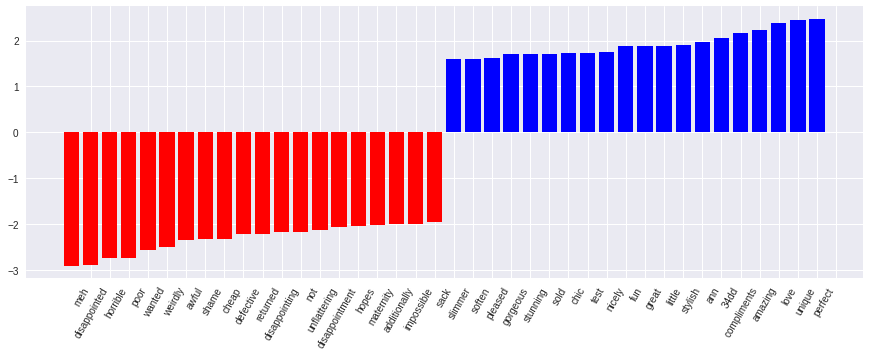

In [98]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(RT)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
X_train = cv.transform(RT)

svm = LinearSVC()
svm.fit(RT_tf, y)
plot_coefficients(svm, cv.get_feature_names())


**Evaluation  with variation of  ngrams setup**

### Review (3)

- ngram length increase = number of texts decrease
- higher ngram = blows up feature space
- for ngram_range=(3,2)... ValueError: empty vocabulary; perhaps the documents only contain stop words
- min_n <= n <= max_n are be used

**Scenario 1**
*After evaluating Accuracy & Precision, the following scenario is used for No 4*

In [118]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

#Train the model using the training sets
clf.fit(X_train, y_train_sub)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_val, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_val, y_pred))


36369
['00', '00 and', '00 in', '00 or', '00 petite', '00 regular', '00 was', '00p', '00p and', '00p in', '00p or', '0p', '0p and', '0p fit', '0p in', '0p is', '0p or', '0p was', '0petite', '10', '10 12', '10 130', '10 140', '10 15', '10 155', '10 160', '10 am', '10 and', '10 at', '10 because', '10 but', '10 fit', '10 fits', '10 for', '10 frame', '10 in', '10 it', '10 lbs', '10 minutes', '10 on', '10 or', '10 ordered', '10 petite', '10 pounds', '10 size', '10 so', '10 the', '10 this', '10 to', '10 usually', '10 was', '10 which', '10 with', '10 years', '100', '100 cotton', '100 lbs', '100 rayon', '100 recommend', '100 silk', '100lbs', '102', '102lbs', '103', '103 lbs', '103lbs', '103lbs and', '104', '104 pounds', '105', '105 and', '105 lbs', '105 pounds', '105lbs', '105lbs and', '106', '106 lbs', '107', '107 lbs', '107lbs', '108', '108 and', '108 lbs', '108 pounds', '109lbs', '10p', '11', '11 and', '11 so', '110', '110 and', '110 lbs', '110 pounds', '110lbs', '110lbs and', '110lbs the',

36369
['00', '00 and', '00 in', '00 or', '00 petite', '00 regular', '00 was', '00p', '00p and', '00p in', '00p or', '0p', '0p and', '0p fit', '0p in', '0p is', '0p or', '0p was', '0petite', '10', '10 12', '10 130', '10 140', '10 15', '10 155', '10 160', '10 am', '10 and', '10 at', '10 because', '10 but', '10 fit', '10 fits', '10 for', '10 frame', '10 in', '10 it', '10 lbs', '10 minutes', '10 on', '10 or', '10 ordered', '10 petite', '10 pounds', '10 size', '10 so', '10 the', '10 this', '10 to', '10 usually', '10 was', '10 which', '10 with', '10 years', '100', '100 cotton', '100 lbs', '100 rayon', '100 recommend', '100 silk', '100lbs', '102', '102lbs', '103', '103 lbs', '103lbs', '103lbs and', '104', '104 pounds', '105', '105 and', '105 lbs', '105 pounds', '105lbs', '105lbs and', '106', '106 lbs', '107', '107 lbs', '107lbs', '108', '108 and', '108 lbs', '108 pounds', '109lbs', '10p', '11', '11 and', '11 so', '110', '110 and', '110 lbs', '110 pounds', '110lbs', '110lbs and', '110lbs the',

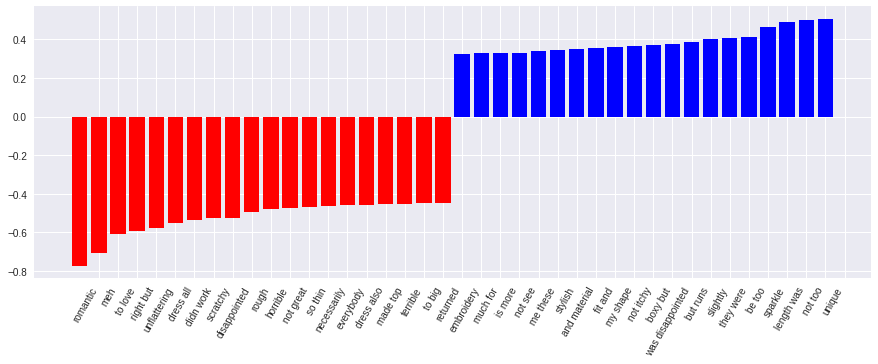

In [99]:
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
X_train = cv.transform(text_train_sub)

svm = LinearSVC()
svm.fit(X_train, y_train_sub)
plot_coefficients(svm, cv.get_feature_names())

**Scenario 2**

In [119]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

cv = CountVectorizer(ngram_range=(2,2), min_df=2)
cv.fit(text_train_sub)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

#Train the model using the training sets
clf.fit(X_train, y_train_sub)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_val, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_val, y_pred))

67584
['00 and', '00 but', '00 for', '00 in', '00 it', '00 or', '00 petite', '00 regular', '00 since', '00 size', '00 so', '00 was', '00 with', '00 would', '00p and', '00p but', '00p in', '00p or', '00p the', '00p was', '0p and', '0p fit', '0p fits', '0p in', '0p is', '0p online', '0p or', '0p the', '0p was', '10 10', '10 12', '10 130', '10 135', '10 140', '10 145', '10 145lb', '10 15', '10 150', '10 155', '10 160', '10 38c', '10 also', '10 am', '10 and', '10 as', '10 at', '10 based', '10 because', '10 body', '10 but', '10 fit', '10 fits', '10 for', '10 frame', '10 got', '10 have', '10 hours', '10 however', '10 if', '10 in', '10 inches', '10 it', '10 lbs', '10 like', '10 love', '10 medium', '10 minutes', '10 model', '10 more', '10 my', '10 normally', '10 on', '10 or', '10 ordered', '10 pant', '10 petite', '10 pounds', '10 right', '10 since', '10 size', '10 so', '10 sometimes', '10 the', '10 there', '10 these', '10 they', '10 think', '10 this', '10 to', '10 tried', '10 usually', '10 was

67584
['00 and', '00 but', '00 for', '00 in', '00 it', '00 or', '00 petite', '00 regular', '00 since', '00 size', '00 so', '00 was', '00 with', '00 would', '00p and', '00p but', '00p in', '00p or', '00p the', '00p was', '0p and', '0p fit', '0p fits', '0p in', '0p is', '0p online', '0p or', '0p the', '0p was', '10 10', '10 12', '10 130', '10 135', '10 140', '10 145', '10 145lb', '10 15', '10 150', '10 155', '10 160', '10 38c', '10 also', '10 am', '10 and', '10 as', '10 at', '10 based', '10 because', '10 body', '10 but', '10 fit', '10 fits', '10 for', '10 frame', '10 got', '10 have', '10 hours', '10 however', '10 if', '10 in', '10 inches', '10 it', '10 lbs', '10 like', '10 love', '10 medium', '10 minutes', '10 model', '10 more', '10 my', '10 normally', '10 on', '10 or', '10 ordered', '10 pant', '10 petite', '10 pounds', '10 right', '10 since', '10 size', '10 so', '10 sometimes', '10 the', '10 there', '10 these', '10 they', '10 think', '10 this', '10 to', '10 tried', '10 usually', '10 was

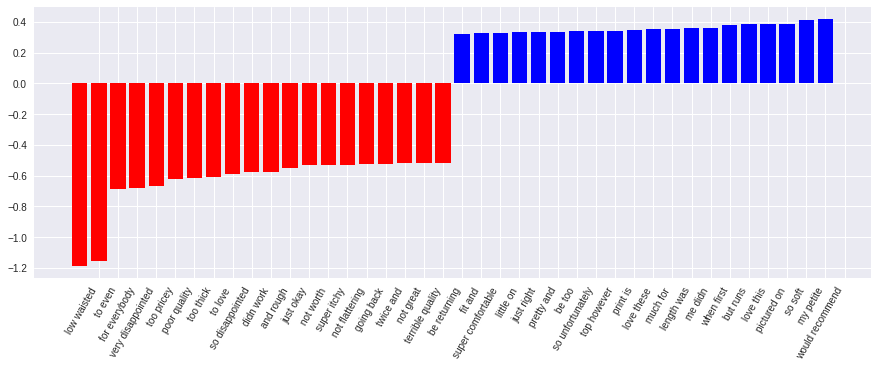

In [100]:
svm = LinearSVC()
svm.fit(X_train, y_train_sub)
plot_coefficients(svm, cv.get_feature_names())

**Scenario 3**

In [120]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

cv = CountVectorizer(ngram_range=(4,4), min_df=4)
cv.fit(text_train_sub)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

#Train the model using the training sets
clf.fit(X_train, y_train_sub)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_val, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_val, y_pred))

14135
['10 12 and ordered', '10 12 in tops', '10 and got the', '10 and it fits', '10 and the fit', '10 and the length', '10 and the medium', '10 or 12 in', '110 lbs and the', '115 lbs 26 in', '115 lbs 30 dd', '115 lbs 30dd 26', '115 lbs 30dd chest', '12 14 and the', '12 and it fit', '12 and ordered the', '120 lbs and ordered', '120 lbs and the', '120 lbs and tried', '125 lbs and ordered', '125 lbs and the', '130 lbs 34d and', '130 lbs and the', '135 36d 38 28', '135 and the small', '135 lbs and ordered', '135 lbs and the', '135 lbs and wear', '135lbs 34c and the', '135lbs 34c curvy muscular', '140 39 28 35', '140 lbs and the', '145 lbs and 38', '145 pounds and the', '145lbs 38 30 40', '150 lbs and ordered', '26 and they fit', '26 in waist 115', '26 or 27 in', '26 waist 34 hips', '26 waist 36 hips', '28 35 and purchased', '28 and they were', '30 dd 26 in', '30dd 26 in waist', '30dd chest 26 in', '32 40 and the', '34b 26 waist 36', '34c and the small', '34c curvy muscular frame', '34d 27

14135
['10 12 and ordered', '10 12 in tops', '10 and got the', '10 and it fits', '10 and the fit', '10 and the length', '10 and the medium', '10 or 12 in', '110 lbs and the', '115 lbs 26 in', '115 lbs 30 dd', '115 lbs 30dd 26', '115 lbs 30dd chest', '12 14 and the', '12 and it fit', '12 and ordered the', '120 lbs and ordered', '120 lbs and the', '120 lbs and tried', '125 lbs and ordered', '125 lbs and the', '130 lbs 34d and', '130 lbs and the', '135 36d 38 28', '135 and the small', '135 lbs and ordered', '135 lbs and the', '135 lbs and wear', '135lbs 34c and the', '135lbs 34c curvy muscular', '140 39 28 35', '140 lbs and the', '145 lbs and 38', '145 pounds and the', '145lbs 38 30 40', '150 lbs and ordered', '26 and they fit', '26 in waist 115', '26 or 27 in', '26 waist 34 hips', '26 waist 36 hips', '28 35 and purchased', '28 and they were', '30 dd 26 in', '30dd 26 in waist', '30dd chest 26 in', '32 40 and the', '34b 26 waist 36', '34c and the small', '34c curvy muscular frame', '34d 27

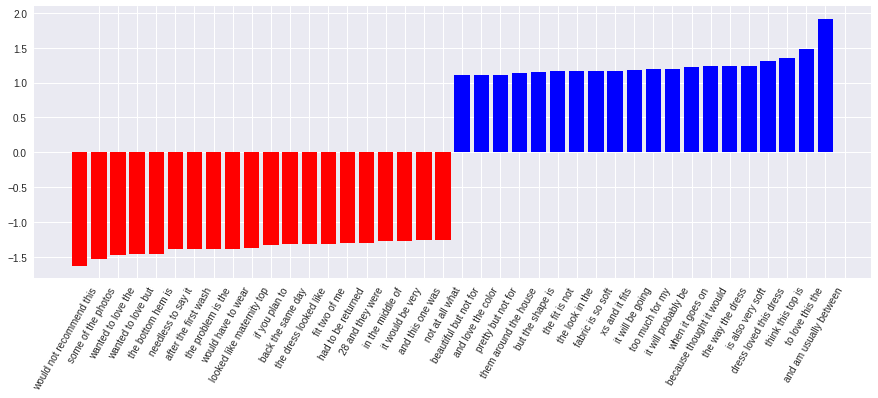

In [101]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer(ngram_range=(4,4), min_df=4)
cv.fit(text_train_sub)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
X_train = cv.transform(text_train_sub)

svm = LinearSVC()
svm.fit(X_train, y_train_sub)
plot_coefficients(svm, cv.get_feature_names())

**Heatmap**

In [0]:
# Code needs revision :(
# relatively large grid and the inclusion of trigrams  
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100],  
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}  

#X_train = cv.transform(text_train_sub)
grid = GridSearchCV(pipe, param_grid, cv=5)  
#svc = svm.SVC()
grid.fit(text_train_sub, y_train_sub)  
print("Best cross-validation score: {:.2f}".format(grid.best_score_))  
print("Best parameters:\n{}".format(grid.best_params_))  




**Task 4 Model Tuning (again)**
*  Revisit your choice of model. Compare different linear models with L1 and L2 penalty on the best performing features from Task 3.

*  Are there any other obvious features to try, or combinations to try out? (Don’t perform them, just list them).

In [0]:
from sklearn.model_selection import train_test_split
text_train_sub, text_val, y_train_sub, y_val = train_test_split(RT, y, stratify=y, random_state=0)

In [0]:
vect_4 = CountVectorizer()
X_train = vect_4.fit_transform(text_train_sub)
X_val = vect_4.transform(text_val)

In [104]:
X_train

<17614x12923 sparse matrix of type '<class 'numpy.int64'>'
	with 747471 stored elements in Compressed Sparse Row format>

In [105]:
len(feature_names)

14679

In [106]:
feature_names = vect_4.get_feature_names()
print(feature_names[:10])
print(feature_names[12903:12923])
print(feature_names[::12900])


['00', '000', '00p', '02', '03', '03dd', '04', '06', '0p', '0petite']
['zigzag', 'zillion', 'zing', 'zip', 'zipepr', 'zipped', 'zipper', 'zippered', 'zippers', 'zippie', 'zipping', 'zips', 'zoe', 'zone', 'zoolander', 'zoom', 'zooming', 'zowie', 'zuma', 'ã¼ber']
['00', 'zero']


In [107]:
from sklearn.linear_model import LogisticRegressionCV
lr4 = LogisticRegressionCV().fit(X_train, y_train_sub)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase t

In [0]:
lr4.C_

array([0.35938137])

In [0]:
lr4.score(X_val, y_val)

0.8995231607629428

**Use Grid Search to Fine Tune Parameters**

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(),X_train, y_train_sub, cv=7)
#lr4_gs = LogisticRegressionCV().fit(X_train, y_train_sub)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**We receive .9 score which indicates reasonable performance with minor enhancemnt when using GridSearch**

In [0]:
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))


Mean cross-validation accuracy: 0.90


The following results 

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.0001,0.05, 0.1, 1, 10,100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=7)
grid.fit(X_train, y_train_sub)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.90
Best parameters:  {'C': 0.1}


**Fine Tune based on Infrequent and Frequent Words**

In [109]:
# Resuts are for frequency of Words repeated
vect4_min2 = CountVectorizer(min_df=2)
vect4_min2.fit(RT)
print(vect4_min2.get_feature_names())

vect4_min4 = CountVectorizer(min_df=4)
vect4_min4.fit(RT)
print(vect4_min4.get_feature_names())

['00', '00p', '03', '0p', '0petite', '0r', '10', '100', '100lbs', '102', '102lbs', '103', '103lbs', '104', '105', '105lbs', '106', '106lbs', '107', '107lb', '107lbs', '108', '108lbs', '109', '109lbs', '10lbs', '10p', '10th', '11', '110', '110lb', '110lbs', '111', '111lbs', '112', '112lbs', '113', '113lbs', '114', '114lbs', '115', '115ish', '115lbs', '116', '116lb', '116lbs', '117', '117lbs', '118', '118lb', '118lbs', '119', '11inches', '12', '120', '120lb', '120lbs', '121', '122', '122lbs', '123', '123lbs', '124', '124lbs', '125', '125lb', '125lbs', '126', '127', '127lb', '127lbs', '128', '128lb', '128lbs', '129', '129lbs', '12p', '13', '130', '130lb', '130lbs', '132', '132lbs', '133', '133lbs', '134', '134lbs', '135', '135lb', '135lbs', '136', '136lbs', '137', '138', '138lbs', '139', '14', '140', '140b', '140lb', '140lbs', '142', '142lbs', '143', '144', '144lb', '145', '145lb', '145lbs', '146', '146lbs', '147', '148', '148lbs', '14p', '15', '150', '150lb', '150lbs', '154', '155', '155

Assessing Impact on model significance by changing values in  CountVectorizer 
We can see significant reduction in number of features as we increase the min_df parameter


In [0]:
X_train_df2min = vect4_min2.fit_transform(text_train_sub)
X_val_df2min = vect4_min2.transform(text_val)
X_train_df4min = vect4_min4.fit_transform(text_train_sub)
X_val_df4min = vect4_min4.transform(text_val)
print(X_train.shape)
print(X_train_df2min.shape)
print(X_train_df4min.shape)

(17614, 12923)
(17614, 7410)
(17614, 4934)


In [0]:
# Results are based on ranking of frequency
vect4_max = CountVectorizer(max_features=20)
vect4_max.fit(RT)
print(vect4_max.get_feature_names())

['and', 'but', 'dress', 'for', 'in', 'is', 'it', 'love', 'my', 'not', 'of', 'on', 'size', 'so', 'that', 'the', 'this', 'to', 'was', 'with']


**Conclusion by requiring at least 2 appearances of each token, numbers of features is reduces 7,410**

In [110]:
# Results are based on ranking of frequency
# Using another code to validate results above
vect4_min2_rev = CountVectorizer(min_df=2).fit(text_train_sub)
full_dataset_transformed = vect4_min2_rev.transform(text_train_sub)
print("Full Dataset with min_df: {}".format(repr(full_dataset_transformed)))



Full Dataset with min_df: <17614x7410 sparse matrix of type '<class 'numpy.int64'>'
	with 741958 stored elements in Compressed Sparse Row format>


Assessing Impact on model significance by changing values in  CountVectorizer 

In [0]:
lr4_min2 = LogisticRegressionCV().fit(X_train_df2min, y_train_sub)
lr4_min4 = LogisticRegressionCV().fit(X_train_df4min, y_train_sub)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase t

In [0]:
lr4_min2.C_

array([0.35938137])

In [0]:
lr4_min4.C_

array([0.35938137])

In [0]:
lr4_min2 = SVC(kernel='linear').fit(X_train_df2min, y_train_sub)
lr4_min4 = SVC(kernel='linear').fit(X_train_df4min, y_train_sub)

In [0]:
#from sklearn.model_selection import GridSearchCV, cross_val_score
#def svc_param_selection(X_train_df2min, y_train_sub, nfolds):
#param_grid = {'C':[0.001, 0.0001,0.05, 0.1, 1, 10,100]}
#grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=8)
#grid_search.fit(X_train_df4min, y_train_sub)
#grid_search.best_params_
#return grid_search.best_params_

from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1, cv=7)
clf.fit(X_train_df4min, y_train_sub)        
clf.best_score_                                  
clf.best_estimator_.C                            


# Prediction performance on test set is not as good as on train set
clf.score(X_train_df4min, y_train_sub)  

# Prediction performance on test set is not as good as on train set
#grid_2min.score(X_train_df4min, y_train_sub)      


  

In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'C':[0.001, 0.0001,0.05, 0.1, 1, 10,100]}
grid_2min = GridSearchCV(estimator=svc, param_grid, cv=7)
grid_2min.fit(X_train_df2min, y_train_sub)        
clf.best_score_                                  
clf.best_estimator_.C 

print("Best cross-validation score: {:.2f}".format(grid_2min.best_score_))
print("Best parameters: ", grid_2min.best_params_)

# Prediction performance on test set is not as good as on train set
#clf.score(X_train_df2min, y_train_sub) 


from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'C':[0.001, 0.0001,0.05, 0.1, 1, 10,100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=7)
grid.fit(X_train, y_train_sub)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)






**Evaluating same Models using Grid Search and Cross Validation**

In [0]:
lr4_min2 = LogisticRegressionCV().fit(X_train_df2min, y_train_sub)
lr4_min4 = LogisticRegressionCV().fit(X_train_df4min, y_train_sub)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores_min2 = cross_val_score(LogisticRegression(),X_train_df2min, y_train_sub, cv=7)
scores_min4 = cross_val_score(LogisticRegression(),X_train_df4min, y_train_sub, cv=7)
#lr4_gs_min2 = LogisticRegressionCV().fit(X_train_df2min, y_train_sub)
#lr4_gs_min4 = LogisticRegressionCV().fit(X_train_df4min, y_train_sub)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase t

In [0]:
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores_min2)))
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores_min4)))

Mean cross-validation accuracy: 0.90
Mean cross-validation accuracy: 0.90


**Results are higher than before applying  eliminating features assumed to be insignifcant based on frequency of min 2**.  Diminishing return on improvement with increasing to 4 and  model indicated no difference

In [0]:
lr4_min2.score(X_val_df2min, y_val)

0.9000340599455041

In [0]:
lr4_min4.score(X_val_df4min, y_val)

0.8993528610354223

In [0]:
vect_stop = CountVectorizer(stop_words='english')
vect_stop.fit(RT)
print(vect_stop.get_feature_names())

['00', '000', '00p', '02', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite', '0r', '0verall', '0xs', '10', '100', '1000', '100lb', '100lbs', '101', '102', '102lbs', '103', '103lb', '103lbs', '104', '104lbs', '105', '105lb', '105lbs', '106', '106lbs', '107', '107lb', '107lbs', '107pound', '108', '108lbs', '109', '109lbs', '10l', '10lbs', '10mths', '10p', '10s', '10th', '10x', '11', '110', '110lb', '110lbs', '111', '111lbs', '112', '112lb', '112lbs', '112llbs', '113', '113lbs', '114', '114lb', '114lbs', '115', '115ish', '115lb', '115lbs', '115llbs', '116', '116bs', '116ibs', '116lb', '116lbs', '117', '117bl', '117lbs', '118', '118lb', '118lbs', '119', '11and', '11in', '11inches', '12', '120', '120lb', '120lbs', '121', '122', '122lb', '122lbs', '123', '123lb', '123lbs', '123lbssize', '124', '124lb', '124lbs', '125', '125b', '125ibs', '125ish', '125lb', '125lbs', '126', '126lbs', '127', '127lb', '127lbs', '128', '128b', '128lb', '128lbs', '129', '129lbs', '12p', '12th', '13', '130',

In [0]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print (list(ENGLISH_STOP_WORDS))

['again', 'back', 'many', 'her', 'otherwise', 'somewhere', 'beyond', 'throughout', 'except', 'any', 'only', 'you', 'mostly', 'call', 'hereafter', 'put', 'co', 'thereupon', 'up', 'wherever', 'always', 'find', 'against', 'well', 'itself', 'thence', 'hereby', 'very', 'two', 'across', 'its', 'must', 'name', 'during', 'fifteen', 'besides', 'afterwards', 'none', 'empty', 'perhaps', 'was', 'rather', 'whose', 'among', 'enough', 'no', 'still', 'had', 'whither', 'being', 'already', 'yourself', 'de', 'ltd', 'their', 'they', 'has', 'eight', 'therefore', 'will', 'one', 'wherein', 'get', 'who', 'hence', 'neither', 'would', 'move', 'see', 'give', 'others', 'although', 'sincere', 'yet', 'became', 'front', 'further', 'latterly', 'anyone', 'been', 'it', 'even', 'keep', 'least', 'though', 'nevertheless', 'over', 'out', 'them', 'bottom', 'made', 'seemed', 'therein', 'most', 'un', 'until', 'have', 'anything', 'detail', 'nobody', 'together', 'an', 'at', 'because', 'where', 'inc', 'former', 'hers', 'ie', 'ea

**4. Applying L1 Regulaization**

L1 applies to Lasso Regression model and it is intended to restricts coefficienys to be close to "0". This results in ignoring those coefficients and makes the model more interpretable

In [142]:
from sklearn.linear_model import Lasso
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

lasso = Lasso().fit(X_train, y_train_sub)
print("Traing set score: {:.2f}".format(lasso.score(X_train, y_train_sub)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_val)))
print("Number of features used: {}",format(np.sum(lasso.coef_ !=0)))

Traing set score: 0.00
Test set score: -0.00
Number of features used: {} 0


Model didn't perform well with default alpha=1.0. Therefore, we will compare other values and increase the maximum number of iteration to run

In [144]:
from sklearn.linear_model import Lasso
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train_sub)
print("Traing set score: {:.2f}".format(lasso001.score(X_train, y_train_sub)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_val)))
print("Number of features used: {}",format(np.sum(lasso001.coef_ !=0)))

Traing set score: 0.17
Test set score: 0.18
Number of features used: {} 28


In [145]:
from sklearn.linear_model import Lasso
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train_sub)
print("Traing set score: {:.2f}".format(lasso0001.score(X_train, y_train_sub)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_val)))
print("Number of features used: {}",format(np.sum(lasso0001.coef_ !=0)))

Traing set score: 0.66
Test set score: 0.47
Number of features used: {} 2973


The following Model - alpha @ 0.00001shows diminishing return when further decreasing alpha in Lasso Model.

As for  alpha = 0.0001 in comparison to 0.01, we get the expected results . In general when decreasing alpha, score for training set is reduced on the account of better performance on test set

In [146]:
from sklearn.linear_model import Lasso
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train_sub)
print("Traing set score: {:.2f}".format(lasso00001.score(X_train, y_train_sub)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_val)))
print("Number of features used: {}",format(np.sum(lasso00001.coef_ !=0)))

Traing set score: 0.95
Test set score: 0.15
Number of features used: {} 12748


**4. Applying L2 Regulaization**

Purpose of applying L2 regularization  to Ridge Model  is to  retstrict model from overfitting by adding the constraint of each feature having little effect on outcome while predcting well.

From model evaluation below, we conclude that model performed much better on traing set thatn test set. I belive it is due to inbalanced data

By icreasing alpha, coeffocients areforced to move toward zero which might decrease performance on training set but helps with generalization

In [123]:
from sklearn.linear_model import Ridge
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

ridge = Ridge().fit(X_train, y_train_sub)
print("Traing set score: {:.2f}".format(ridge.score(X_train, y_train_sub)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_val)))



Traing set score: 0.96
Test set score: 0.21


In [130]:
print(y_train_sub.value_counts())
print(y_val.value_counts())

1    14485
0     3129
Name: Recommended, dtype: int64
1    4829
0    1043
Name: Recommended, dtype: int64


Increasing Alpha. from default value to 10
Result below as expected  - decrease in training set score and double increase for test set

In [132]:
from sklearn.linear_model import Ridge
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

ridge10 = Ridge(alpha=10).fit(X_train, y_train_sub)
print("Traing set score: {:.2f}".format(ridge10.score(X_train, y_train_sub)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_val)))


Traing set score: 0.88
Test set score: 0.40


In [133]:
from sklearn.linear_model import Ridge
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

ridge05 = Ridge(alpha=0.5).fit(X_train, y_train_sub)
print("Traing set score: {:.2f}".format(ridge05.score(X_train, y_train_sub)))
print("Test set score: {:.2f}".format(ridge05.score(X_test, y_val)))


Traing set score: 0.96
Test set score: 0.17


Performance results are as expected. There is diminishing return in increasing Alpha above 10

In [134]:
from sklearn.linear_model import Ridge
cv = CountVectorizer(ngram_range=(1,2), min_df=4)
cv.fit(text_train_sub)
X_train = cv.transform(text_train_sub)
X_test = cv.transform(text_val)

ridge20 = Ridge(alpha=20).fit(X_train, y_train_sub)
print("Traing set score: {:.2f}".format(ridge20.score(X_train, y_train_sub)))
print("Test set score: {:.2f}".format(ridge20.score(X_test, y_val)))


Traing set score: 0.83
Test set score: 0.44


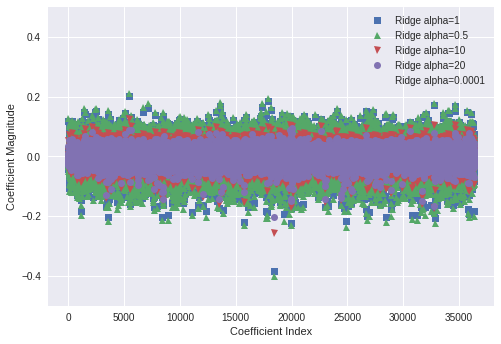

In [149]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge05.coef_, '^', label="Ridge alpha=0.5")
plt.plot(ridge10.coef_, 'v', label="Ridge alpha=10")
plt.plot(ridge20.coef_, 'o', label="Ridge alpha=20")

plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.ylim(-.5,.5)
plt.legend()

Comparing Lasso Coefficients to Ridge Model with best results
Ridge Model is more centered around Zero in Comparison to Lasso 

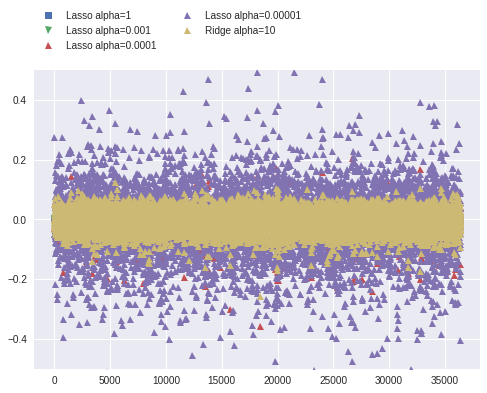

In [153]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'v', label="Lasso alpha=0.001")
plt.plot(lasso0001.coef_, '^', label="Lasso alpha=0.0001")
plt.plot(lasso00001.coef_, '^', label="Lasso alpha=0.00001")

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-0.5,0.5)
plt.xlabel=("Coefficient Index")
plt.ylabel=("Coefficient Magnitude")

**Experimentation Only**

In [0]:
# https://www.kaggle.com/tunguz/logistic-regression-with-words-and-char-n-grams
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack